In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [36]:
df = pd.read_csv('sw_results.csv')
df

,Year,Flow Class,Qr,S_top,S_bot,T_top,T_bot,V_top,V_mix,rho_top,rho_bot,Fr,Ls,D_int,u_exit
0,2018,high,413.23,2.21,20.39,14.50,12.63,-0.1807,-0.1490,1000.89,1015.12,1.4889,-20,13.04,0.2066
1,2018,low,53.15,6.60,22.14,5.35,7.20,-0.2172,-0.0590,1005.19,1017.21,0.2270,1420,3.72,0.0266
2,2018,max,379.02,4.86,21.91,8.49,11.08,-0.1890,-0.0845,1003.63,1016.52,1.5085,-20,13.15,0.1895
3,2019,high,367.81,2.98,21.29,15.26,13.05,-0.1723,-0.1388,1001.37,1015.73,1.3126,-10,11.99,0.1839
4,2019,low,24.18,7.80,23.20,4.52,6.87,-0.2280,-0.0569,1006.16,1018.08,0.1043,8500,2.22,0.0121
5,2019,max,437.98,2.16,22.26,18.27,14.37,-0.1721,-0.1342,1000.21,1016.23,1.4022,-10,12.53,0.2190
6,2018,mid,241.86,4.53,23.29,15.90,13.86,-0.1974,-0.0941,1002.44,1017.12,0.8461,0,8.95,0.1209
7,2019,mid,174.03,6.98,24.71,11.63,12.05,-0.2049,-0.0870,1004.95,1018.53,0.6590,20,7.57,0.0870


0.0427391796035127
0.0034460978372712614


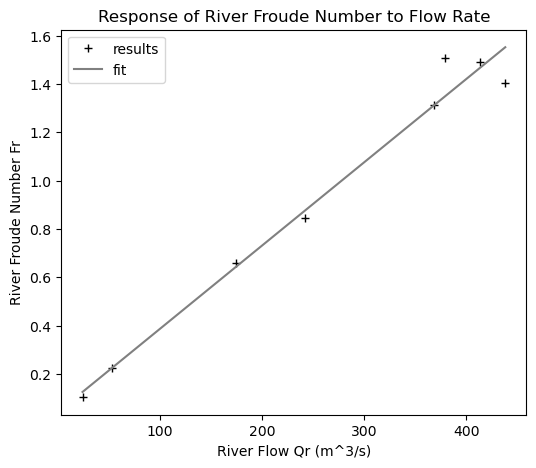

In [37]:
QrFr = stats.linregress(df['Qr'], df['Fr'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(df['Qr'], df['Fr'],'k+',label='results')
ax.plot(df['Qr'].sort_values(ascending=True), QrFr.intercept + QrFr.slope * df['Qr'].sort_values(ascending=True), 'grey', label='fit')
ax.set_xlabel('River Flow Qr (m^3/s)')
ax.set_ylabel('River Froude Number Fr')
ax.set_title('Response of River Froude Number to Flow Rate')
ax.legend()

print(QrFr.intercept)
print(QrFr.slope)

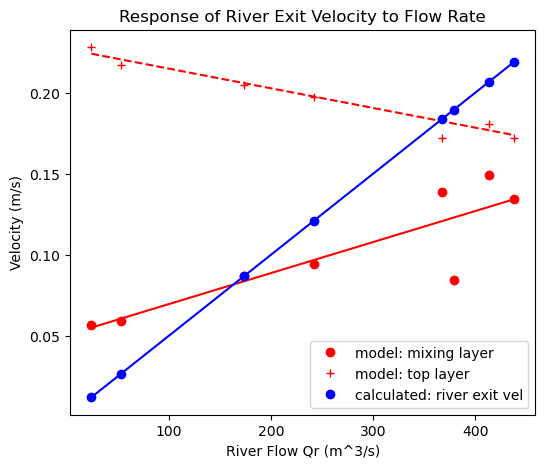

In [38]:
QrVmix = stats.linregress(df['Qr'], -df['V_mix'])
QrVtop = stats.linregress(df['Qr'], -df['V_top'])
Qruexit = stats.linregress(df['Qr'], df['u_exit'])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(df['Qr'], -df['V_mix'],'ro',label='model: mixing layer')
ax.plot(df['Qr'].sort_values(ascending=True), QrVmix.intercept + QrVmix.slope * df['Qr'].sort_values(ascending=True), 'r')

ax.plot(df['Qr'], -df['V_top'],'r+',label='model: top layer')
ax.plot(df['Qr'].sort_values(ascending=True), QrVtop.intercept + QrVtop.slope * df['Qr'].sort_values(ascending=True), 'r--')

ax.plot(df['Qr'], df['u_exit'],'bo',label='calculated: river exit vel')
ax.plot(df['Qr'].sort_values(ascending=True), Qruexit.intercept + Qruexit.slope * df['Qr'].sort_values(ascending=True), 'b')

ax.set_xlabel('River Flow Qr (m^3/s)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Response of River Exit Velocity to Flow Rate')
ax.legend()